In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DATASET = "P2P"

In [5]:
train_df = pd.read_csv(f"/ceph/lfertig/Thesis/data/{DATASET}/processed/next_activity_train.csv")
val_df   = pd.read_csv(f"/ceph/lfertig/Thesis/data/{DATASET}/processed/next_activity_val.csv")
test_df  = pd.read_csv(f"/ceph/lfertig/Thesis/data/{DATASET}/processed/next_activity_test.csv")

for d in (train_df, val_df, test_df):
    d.rename(columns={"next_act": "next_activity"}, inplace=True)
    d["prefix"] = d["prefix"].astype(str).str.split() # convert space-separated strings to lists

print(f"Train prefixes: {len(train_df)} - Validation prefixes: {len(val_df)} - Test prefixes: {len(test_df)}")

Train prefixes: 6703 - Validation prefixes: 652 - Test prefixes: 1156



=== Train Dataset ===
Number of prefixes: 6703
Number of unique activities: 20
Activity counts:
next_activity
analyze-request-for-quotation             819
create-request-for-quotation              410
amend-request-for-quotation               409
release-purchase-order                    358
analyze-quotation-comparison-map          335
choose-best-option                        335
settle-conditions-with-supplier           335
create-purchase-order                     335
confirm-purchase-order                    335
deliver-goods-services                    335
create-quotation-comparison-map           335
approve-purchase-order-for-payment        335
send-invoice                              335
authorize-supplier's-invoice-payment      335
pay-invoice                               335
send-request-for-quotation-to-supplier    335
release-supplier's-invoice                326
analyze-purchase-requisition              272
settle-dispute-with-supplier               80
amend-purchase-

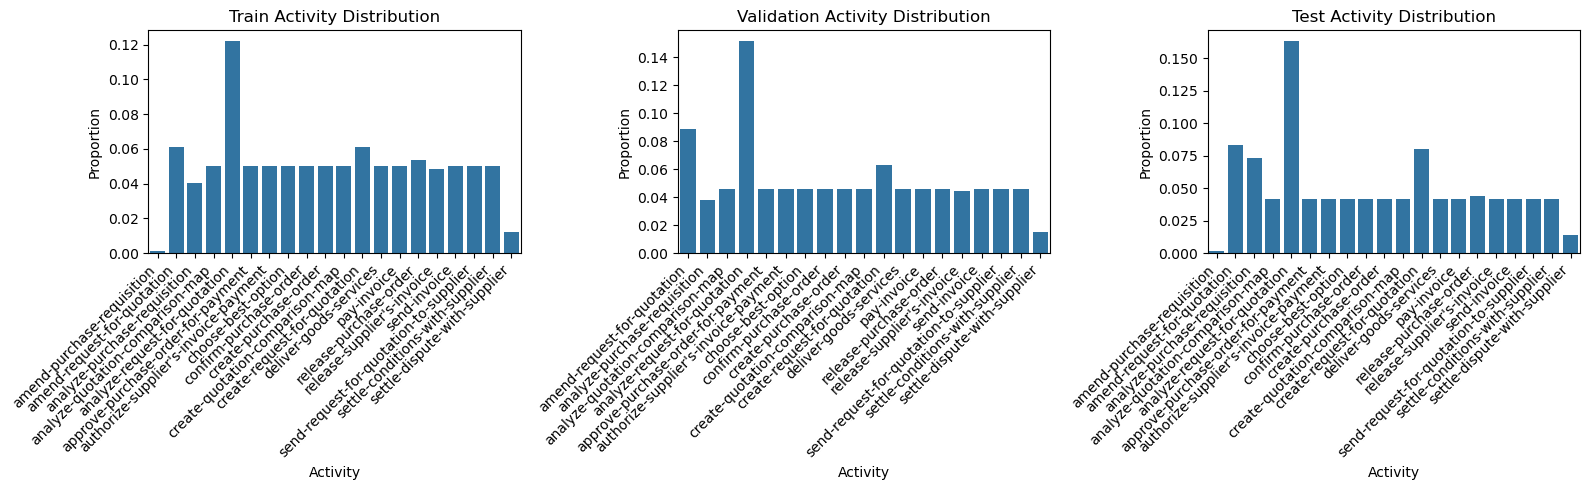

Activities in Train but not in Validation: {'amend-purchase-requisition'}
Activities in Train but not in Test: set()
Activities in Validation but not in Test: set()

Top 10 Activities in Train Set (by proportion):
next_activity
analyze-request-for-quotation       0.122184
create-request-for-quotation        0.061167
amend-request-for-quotation         0.061017
release-purchase-order              0.053409
analyze-quotation-comparison-map    0.049978
choose-best-option                  0.049978
settle-conditions-with-supplier     0.049978
create-purchase-order               0.049978
confirm-purchase-order              0.049978
deliver-goods-services              0.049978
Name: proportion, dtype: float64


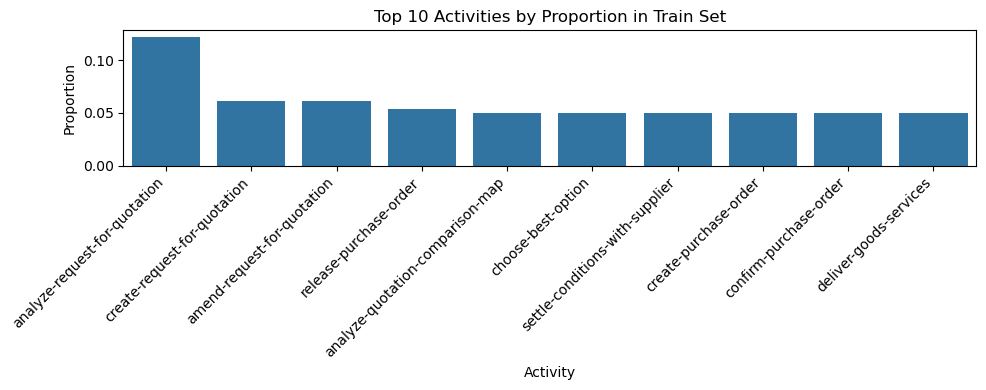

In [6]:
def activity_distribution_analysis(train_df, val_df, test_df):
    # Combine all datasets for comparison
    datasets = {"Train": train_df, "Validation": val_df, "Test": test_df}

    # Summary stats and unique activities
    for name, df in datasets.items():
        print(f"\n=== {name} Dataset ===")
        print(f"Number of prefixes: {len(df)}")
        activity_counts = df['next_activity'].value_counts()
        print(f"Number of unique activities: {len(activity_counts)}")
        print(f"Activity counts:\n{activity_counts}\n")

    # Plot activity distributions side by side
    plt.figure(figsize=(16, 5))
    for i, (name, df) in enumerate(datasets.items(), start=1):
        plt.subplot(1, 3, i)
        counts = df['next_activity'].value_counts(normalize=True).sort_index()
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(f"{name} Activity Distribution")
        plt.xlabel("Activity")
        plt.ylabel("Proportion")
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Compare activity presence across datasets
    train_activities = set(train_df['next_activity'].unique())
    val_activities = set(val_df['next_activity'].unique())
    test_activities = set(test_df['next_activity'].unique())

    print(f"Activities in Train but not in Validation: {train_activities - val_activities}")
    print(f"Activities in Train but not in Test: {train_activities - test_activities}")
    print(f"Activities in Validation but not in Test: {val_activities - test_activities}")

    # Class imbalance: top 10 activities in train set
    train_top_10 = train_df['next_activity'].value_counts(normalize=True).head(10)
    print("\nTop 10 Activities in Train Set (by proportion):")
    print(train_top_10)

    # Visualize class imbalance in train
    plt.figure(figsize=(10, 4))
    sns.barplot(x=train_top_10.index, y=train_top_10.values)
    plt.title("Top 10 Activities by Proportion in Train Set")
    plt.xlabel("Activity")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

activity_distribution_analysis(train_df, val_df, test_df)



=== Train Dataset Overview ===
Number of prefixes: 6703
Columns and types:
case_id           int64
prefix           object
k                 int64
next_activity    object
dtype: object

Missing values per column:
case_id          0
prefix           0
k                0
next_activity    0
dtype: int64

First 5 rows:
   case_id                                             prefix  k  \
0        1                      [create-purchase-requisition]  0   
1        1  [create-purchase-requisition, create-request-f...  1   
2        1  [create-purchase-requisition, create-request-f...  2   
3        1  [create-purchase-requisition, create-request-f...  3   
4        1  [create-purchase-requisition, create-request-f...  4   

                            next_activity  
0            create-request-for-quotation  
1           analyze-request-for-quotation  
2  send-request-for-quotation-to-supplier  
3         create-quotation-comparison-map  
4        analyze-quotation-comparison-map  

Unique n

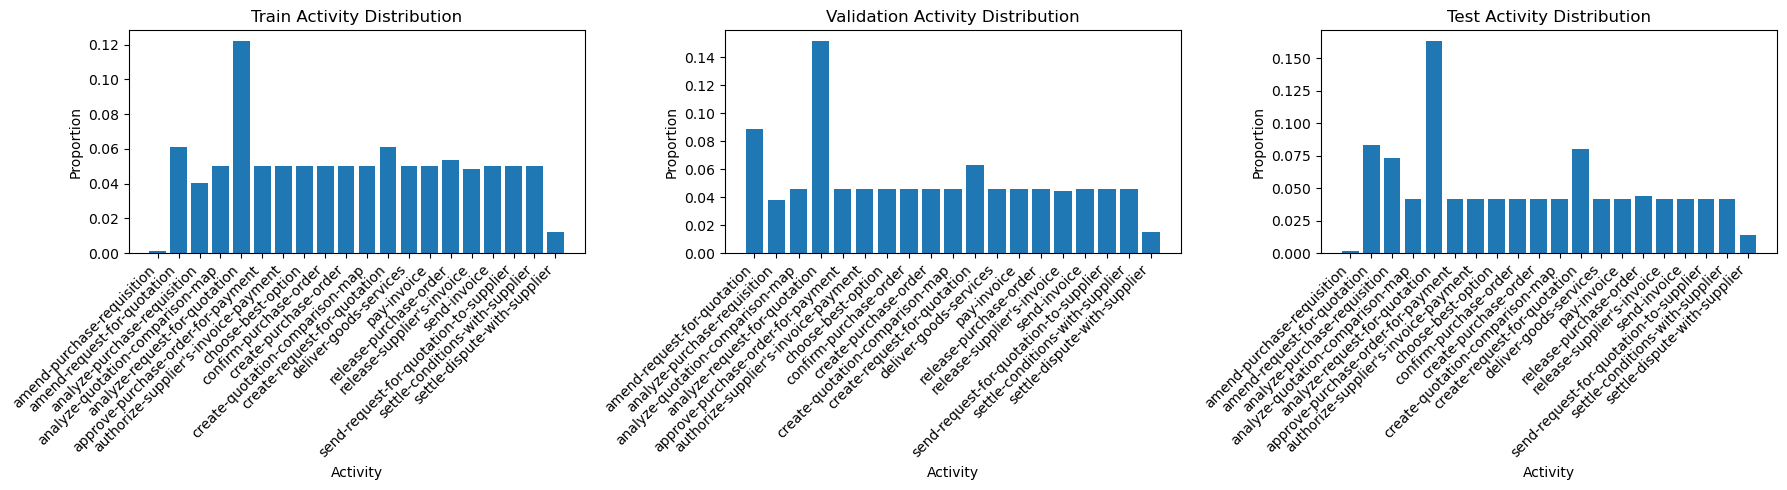


In Train, aber nicht in Validation: {'amend-purchase-requisition'}
In Train, aber nicht in Test: set()
In Validation, aber nicht in Test: set()

=== Top 20 Direkt folgender Aktivitäts-Paare im Trainingsdatensatz ===
(create-request-for-quotation, analyze-request-for-quotation)                410
(amend-request-for-quotation, analyze-request-for-quotation)                 409
(analyze-request-for-quotation, amend-request-for-quotation)                 409
(send-request-for-quotation-to-supplier, create-quotation-comparison-map)    335
(create-quotation-comparison-map, analyze-quotation-comparison-map)          335
(analyze-quotation-comparison-map, choose-best-option)                       335
(choose-best-option, settle-conditions-with-supplier)                        335
(settle-conditions-with-supplier, create-purchase-order)                     335
(create-purchase-order, confirm-purchase-order)                              335
(confirm-purchase-order, deliver-goods-services)      

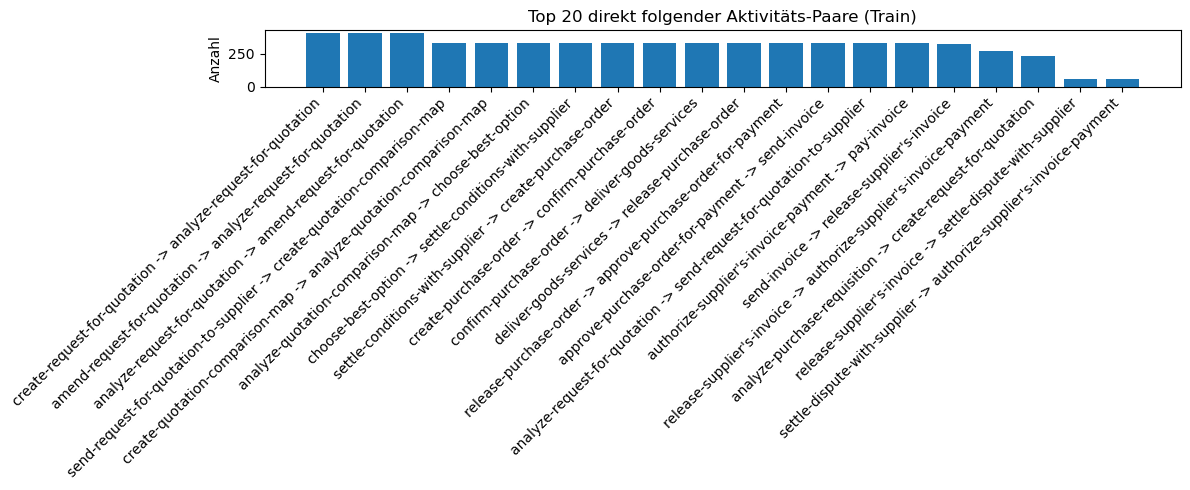

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def explore_datasets(train_df, val_df, test_df):
    datasets = {"Train": train_df, "Validation": val_df, "Test": test_df}

    for name, df in datasets.items():
        print(f"\n=== {name} Dataset Overview ===")
        print(f"Number of prefixes: {len(df)}")
        print("Columns and types:")
        print(df.dtypes)
        print(f"\nMissing values per column:\n{df.isna().sum()}")
        print(f"\nFirst 5 rows:\n{df.head()}")
        
        # next_activity Klassenverteilung
        class_counts = df['next_activity'].value_counts()
        print(f"\nUnique next_activity classes ({len(class_counts)}):")
        print(class_counts)
        
        # Präfixlänge analysieren
        prefix_lengths = df['prefix'].apply(len)
        print(f"\nPrefix length statistics (number of events in prefix):")
        print(prefix_lengths.describe())
        
        # Optional: Zeitliche Features (falls vorhanden)
        for col in df.columns:
            if "date" in col or "time" in col:
                print(f"\nTemporal coverage for column '{col}':")
                try:
                    dt_col = pd.to_datetime(df[col], errors='coerce')
                    print(f"Min date: {dt_col.min()}")
                    print(f"Max date: {dt_col.max()}")
                    plt.hist(dt_col.dropna(), bins=50)
                    plt.title(f"{name} Dataset: Distribution of {col}")
                    plt.xlabel("Date")
                    plt.ylabel("Count")
                    plt.show()
                except Exception as e:
                    print(f"Could not parse {col}: {e}")

    # Klassenverteilung über alle Datensätze vergleichen
    print("\n=== Vergleich der next_activity Klassenverteilungen ===")
    plt.figure(figsize=(18, 5))
    for i, (name, df) in enumerate(datasets.items(), 1):
        plt.subplot(1, 3, i)
        counts = df['next_activity'].value_counts(normalize=True).sort_index()
        plt.bar(counts.index, counts.values)
        plt.title(f"{name} Activity Distribution")
        plt.xticks(rotation=45, ha='right')
        plt.xlabel("Activity")
        plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()

    # Aktivitäten, die nur in einzelnen Datensätzen vorkommen
    train_activities = set(train_df['next_activity'].unique())
    val_activities = set(val_df['next_activity'].unique())
    test_activities = set(test_df['next_activity'].unique())
    
    print(f"\nIn Train, aber nicht in Validation: {train_activities - val_activities}")
    print(f"In Train, aber nicht in Test: {train_activities - test_activities}")
    print(f"In Validation, aber nicht in Test: {val_activities - test_activities}")

    # Häufige Aktivitätsübergänge (Directly Follows Pairs) im Trainingsdatensatz
    def get_directly_follows(df, case_col="case_id", act_col="next_activity"):
        pairs = []
        for _, group in df.groupby(case_col):
            acts = group[act_col].dropna().tolist()
            pairs.extend(zip(acts[:-1], acts[1:]))
        return pd.Series(pairs).value_counts().head(20)
    
    if "case_id" in train_df.columns:
        print("\n=== Top 20 Direkt folgender Aktivitäts-Paare im Trainingsdatensatz ===")
        df_pairs = get_directly_follows(train_df)
        print(df_pairs)
        plt.figure(figsize=(12, 5))
        labels = [f"{a} -> {b}" for a, b in df_pairs.index]
        plt.bar(labels, df_pairs.values)
        plt.title("Top 20 direkt folgender Aktivitäts-Paare (Train)")
        plt.xticks(rotation=45, ha='right')
        plt.ylabel("Anzahl")
        plt.tight_layout()
        plt.show()

# Nach dem Laden der Daten aufrufen:
explore_datasets(train_df, val_df, test_df)
